# Introduction
This is the Capstone Project of the Google Data Analytics Professional Certificate.

Title: Data Analysis of BellaBeat

Created by: Vamsi Yarlagadda

Date: 25/09/2021



---
### The outline of this project will follow the 6 steps of data analysis. Ask, Prepare, Process, Analyse, Share and Act
---
# **ASK**

## 1.0 Background

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. 
Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around 
the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with 
knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly 
positioned itself as a tech-driven wellness company for women.

## 1.1 Business Task

Analyse the FitBit Fitness Tracker Data avaiable on Kaggle to gain insights into how consumers are using the FitBit app and discover trends and insights to provide business recommendations for BellaBeat's marketing strategy.

## 1.2 Key Stakeholders

* **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer 
* **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

## 1.3 Business Objectives

1. What are some trends in smart device usage? 
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help influence Bellabeat marketing strategy? 

## 1.4 Deliverables

1. A clear summary of the business task 
2. A description of all data sources used 
3. Documentation of any cleaning or manipulation of data 
4. A summary of your analysis 
5. Supporting visualizations and key findings 
6. Your top high-level content recommendations based on your analysis 

---
# **PREPARE**

## 2.0 Data Source Information

* The dataset is publicly available on [Kaggle](https://www.kaggle.com/arashnic/fitbit).
* Generated by respondents from a distributed survey via Amazon Mechanical Turk between 03.12.2016 - 05.12.2016.
* 30 eligible Fitbit users consented to the submission of personal tracker data. 
* Data also included minute-level output for physical activity, heart rate, and sleep monitoring.
* The data is organised in a wide format.

## 2.1 ROCCC

ROCCC stands for Reliable, Original, Comprehensive, Current and Cited.

1. Reliable - It only has 30 respondents which is not representative of the entire female population.
2. Original - Amazon Mechnical Turk is the third party source.
3. Comprehensive - The parameters match most of Bellabeat's product parameters.
4. Current - The data is collected from 2016 which can be irrelevent since user's daily activity, fitness and sleeping habits would have changed since then.
5. Cited - Unknown as the data was collected from a third party source.

This dataset has a usability score of 10/10 however it can be considered as bad quality data which cannot be fully trusted to provide good business recommendations.

---
# **PROCESS**

In order to prepare and process the dataset, I used Python.

## 3.0 Installing the libraries and packages

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as plt
import datetime as dt

## 3.1 Importing the dataset

I will be using the `dailyActivity_merged.csv` dataset for analysis.

In [3]:
# Using pandas read_csv function to read the dataset
daily_activity = pd.read_csv("dailyActivity_merged.csv")

## 3.2 Data Cleaning

In this step I will be cleaning the data, looking for errors and preparing it for the next step, analysis.

### 3.2.1 Check for null or missing values

In [4]:
missing_values_count = daily_activity.isnull().sum() # Collects the number of missing values in each column
missing_values_count[:] # Shows the number of missing values

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

**There's no missing values in all 15 columns.**

### 3.2.2 Unique ID Count

In this step I will be confirming if there is 30 unique ID's.

In [5]:
unique_id = len(pd.unique(daily_activity["Id"])) # Counts distinct values of the Id column
  
print("# of unique Id: " + str(unique_id)) # Prints the number of unique ID's found

# of unique Id: 33


It seems that there's 3 extra unique ID's from our supposed 30 despondents.

### 3.2.3 Data Types

All of the data types of each column must match their values. In order to check this, I will using the code below.

In [6]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

From the above data we can see that `ActivityDate` has the wrong data type `object`. To fix this we need to convert it to `datetime64` and also format it to `yyyy-mm-dd`.

In [7]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y") # Converted "ActivityDate" to datetime64 and formatted it to yyyy-mm-dd.

In [8]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

As we can see, the data type has been correctly changed.

In [9]:
daily_activity.head(10) # Shows the first 10 rows of the data set

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


The ActivityDate has also been formatted to `yyyy-mm-dd`.

### 3.2.4 Column Names and Formatting

I will be changing the column names using the style, Snake Case. For example `TotalDistance` -> `total_distance`.

But first I will be adding 3 new columns which will be `day_of_the_week`, `total_exercise_mins`, and `total_exercise_hours`.

In [10]:
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

df_activity = daily_activity.reindex(columns=new_cols) # Reindex function to rearrange the existing columns with the 'new_cols'.

df_activity.head(10)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863
5,1503960366,2016-04-17,NaN,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,NaN,NaN,1728
6,1503960366,2016-04-18,NaN,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,NaN,NaN,1921
7,1503960366,2016-04-19,NaN,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,NaN,NaN,2035
8,1503960366,2016-04-20,NaN,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,NaN,NaN,1786
9,1503960366,2016-04-21,NaN,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,NaN,NaN,1775


In [11]:
df_activity["DayOfTheWeek"] = df_activity["ActivityDate"].dt.day_name() # Creates the new column by seperating the date into days of the week.

df_activity["DayOfTheWeek"].head(10)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
5       Sunday
6       Monday
7      Tuesday
8    Wednesday
9     Thursday
Name: DayOfTheWeek, dtype: object

In [12]:
# Renamed columns
df_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_distance", "TrackerDistance":"track_distance", "LoggedActivitiesDistance":"logged_distance", "VeryActiveDistance":"very_active_distance", "ModeratelyActiveDistance":"moderate_active_distance", "LightActiveDistance":"light_active_distance", "SedentaryActiveDistance":"sedentary_active_distance", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

df_activity.head(10)

,id,date,day_of_the_week,total_steps,total_distance,track_distance,logged_distance,very_active_distance,moderate_active_distance,light_active_distance,sedentary_active_distance,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863
5,1503960366,2016-04-17,Sunday,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,NaN,NaN,1728
6,1503960366,2016-04-18,Monday,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,NaN,NaN,1921
7,1503960366,2016-04-19,Tuesday,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,NaN,NaN,2035
8,1503960366,2016-04-20,Wednesday,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,NaN,NaN,1786
9,1503960366,2016-04-21,Thursday,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,NaN,NaN,1775


In [13]:
# Created a new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]
df_activity["total_mins"].head(10)

0    1094
1    1033
2    1440
3     998
4    1040
5     761
6    1440
7    1120
8    1063
9    1076
Name: total_mins, dtype: int64

In [14]:
# Created a new column *total_hours* by converting 'total_mins' to hours and rounding the float to two decimal places.
df_activity["total_hours"] = round(df_activity["total_mins"] / 60)

df_activity["total_hours"].head(10)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
5    13.0
6    24.0
7    19.0
8    18.0
9    18.0
Name: total_hours, dtype: float64

---
# **ANALYSE**

## 4.0 Perform Calculations



In [15]:
df_activity.describe() # Returns general statistics of the dataset.

,id,total_steps,total_distance,track_distance,logged_distance,very_active_distance,moderate_active_distance,light_active_distance,sedentary_active_distance,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


The above code returns the **count, mean, standard deviation, min, max** and the **percentiles (25%, 50%** and **75%)**.

Based on the statistical findings:

* The **average total steps is 7637** and **total distance is 5.47km** which is an average amount when referencing to the [2011 Study](https://ijbnpa.biomedcentral.com/articles/10.1186/1479-5868-8-79). Healthy adults can take anywhere between **approximately 4,000 and 18,000 steps a day**, and that **10,000 steps a day** is a reasonable target for healthy adults.
* Average calories burned is **2,303 calories**, this cannot be interpreted into much detail since calories burned depend on various factors such as age, weight, acitivity level and hormones.
* Sedentary users are the majority logging on **average 991 minutes or 16.5 hours** making up **81.33% of total average minutes/hours** which isn't healthy as a [2013 study](https://pubmed.ncbi.nlm.nih.gov/23953353/), which included almost 9,000 women, found that those who were physically inactive and sat for **seven hours or more per day were three times as likely to have symptoms of depression** than individuals who met the physical activity guidelines and sat for **less than four hours daily**. 

# **SHARE**

We are going to create visualisations and communicate our findings based on our analysis.

## 5.0 Data Visualisation and Findings

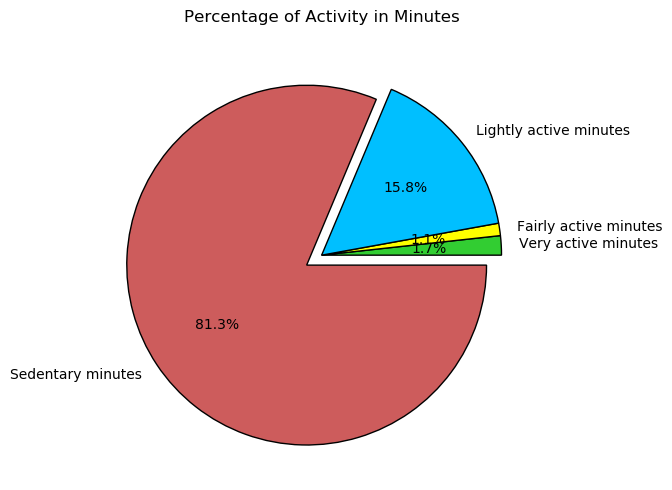

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Calculated the total of the individual minutes column
very_active_mins = df_activity["very_active_mins"].sum()
fairly_active_mins = df_activity["fairly_active_mins"].sum()
lightly_active_mins = df_activity["lightly_active_mins"].sum()
sedentary_mins = df_activity["sedentary_mins"].sum()

# Plotting a Pie Chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["limegreen", "yellow", "deepskyblue", "indianred"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

### Percentage of Activity in Minutes

* Sedentary minutes is the largest at 81.3% (16 hours). This indicates that the users are mostly sitting at home/work, however this value can also include the user's sleeping hours.
* App is rarely being used to track fitness as seen from the percentage of fairly active activity (1.1%) and very active activity (1.7%). This is extremely discouraging as the app and devices was developed to encourage health & fitness.

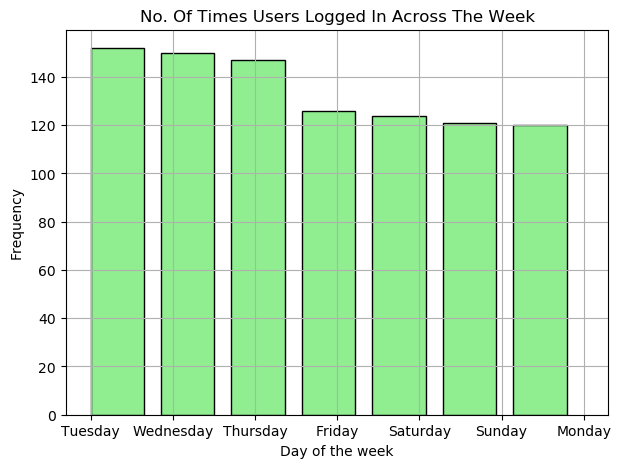

In [17]:
import matplotlib.pyplot as plt

# Plotting a Histogram
plt.style.use("default")
plt.figure(figsize=(7,5))
plt.hist(df_activity.day_of_the_week, bins = 7, 
         width = 0.65, color = "lightgreen", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. Of Times Users Logged In Across The Week")
plt.grid(True)
plt.show()

### Number Of Times Users Logged In Across The Week

* We discovered that users prefer or remember to track their activity on the app during midweek from Tuesday to Friday. Which also correlates to the fact that the highest number of steps is on a Tuesday and Wednesday. 
* The frequency dropped on Friday and continue on weekends and Monday since many user's stay at home on the weekends.

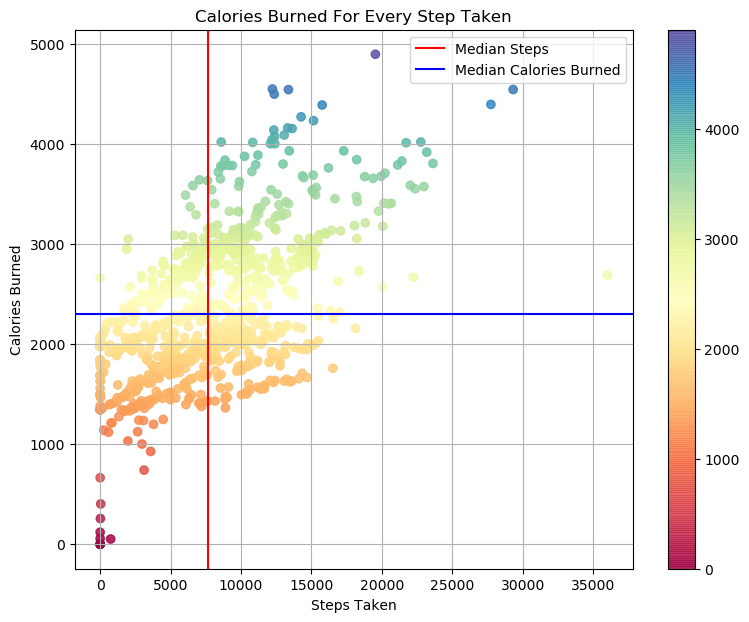

In [18]:
import matplotlib.pyplot as plt

# Plotting a Scatter Plot
plt.style.use("default")
plt.figure(figsize=(9,7))
plt.scatter(df_activity.total_steps, df_activity.calories, 
            alpha = 0.85, c = df_activity.calories, 
            cmap = "Spectral")

# add annotations and visuals
median_calories = 2304
median_steps = 7638

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Red", label = "Median Steps")
plt.axhline(median_calories, color = "Blue", label = "Median Calories Burned")
plt.xlabel("Steps Taken")
plt.ylabel("Calories Burned")
plt.title("Calories Burned For Every Step Taken")
plt.grid(True)
plt.legend()
plt.show()

### Calories Burned For Every Step Taken

* The scatter plot has a positive correlation.
* Observed that intensity of calories burned increase when users are at the range of 0 to 15,000 steps with calories burn rate slow from 15,000 steps onwards.
* Outliers:
    1. 0 steps with 0 to minimal calories burned.
    2. 1 observation of > 35,000 steps with < 3,000 calories burned.
    3. 1 observation of ~ 19,000 steps with ~ 4900 calories burned.
    4. Deduced that outliers could be due to the change in user's usage or errors in data collection (ie. human error or miscalculations).



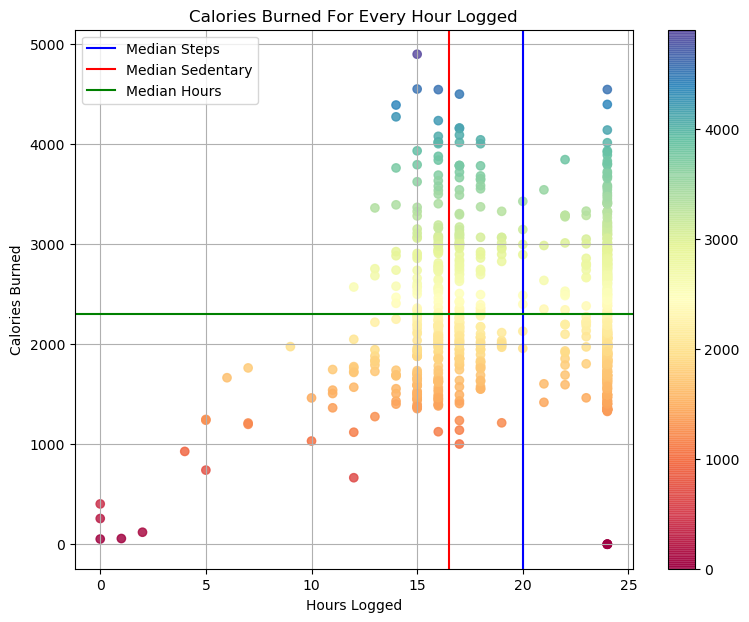

In [19]:
import matplotlib.pyplot as plt

# Plotting a Scatter Plot
plt.style.use("default")
plt.figure(figsize=(9,7)) 
plt.scatter(df_activity.total_hours, df_activity.calories, 
            alpha = 0.85, c = df_activity.calories, 
            cmap = "Spectral")

# adding annotations and visuals
median_calories = 2304
median_hours = 20
median_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median Steps")
plt.axvline(median_sedentary, color = "Red", label = "Median Sedentary")
plt.axhline(median_calories, color = "Green", label = "Median Hours")
plt.xlabel("Hours Logged")
plt.ylabel("Calories Burned")
plt.title("Calories Burned For Every Hour Logged")
plt.legend()
plt.grid(True)
plt.show()

### Calories Burned For Every Hour Logged

* The scatter plot has a slightly positive correlation.
* The increase in hours does not mean an increase in calories burned. This is mainly due to the amount of sedentary hours which can be seen as the red line.
* Outliers:
    1. 0 steps with 0 to minimal calories burned.
    2. 1 observation of ~ 24 hours with 0 calories burned.
    3. Deduced that outliers could be due to the change in user's usage or errors in data collection (ie. human error or miscalculations).

---
# **ACT**

**What are the trends identified?**
* Majority of the users have a low activity rate when comparing their sedentary minutes to their active minutes, 81.3% of their total time is sedentary activities.
* Users tend to track their fitness activities during the weekdays as shown from the frequency of logging into the app. The reason is most likely that users tend to spend most of their at home on the weekends.

**How could these trends apply to BellaBeat customers?**
* Both FitBit and BellaBeat revolve around devices and gadgets tracking and helping the health and fitness of their customers. The common trends found using the data from the FitBit dataset can easily be applied to BellaBeat customers.

**How could these trends help influence BellaBeat marketing strategy?**
* BellaBeat marketing team can set alerts for users who spend too much time on sedentary activities to help remind them that they need to take a break and exercise. This can also be done for the weekends where users usually don't have any tracked fitness activities.
* The marketing team could also provide more information regarding the negative outcomes of spending too much time on sedentary activities which could increase the need to exercise.
* Goals for the steps per day could also be set to 10,000 steps which can drive more users to use their BellaBeat wearables to exercise often.